# K-Nearest Neighbors 
Supervised- Classification Algorithm

![](iris_petal_sepal.png)

# Steps:
1. Pick a value for K.
2. Calculate the distance from the new case.
3. Search for the K observations in the training data that are ‘nearest’ to the measurements
of the unknown data point.
4. Predict the response of the unknown data point using the most popular response value from the K nearest neighbors.

##### Note:A low value of K causes a highly complex model as well, which might result in over-fitting of the model.

![](pic3.jpeg)

In [1]:
## Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
df = pd.read_csv('iris_data.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data visualization and Analysis

In [4]:
df.shape

(150, 6)

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Splitting data frame into target and non-target

In [6]:
X = df.iloc[:,:5] # In row we require all and in column uptill 4
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [7]:
Y = df.iloc[:,-1]
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

# Data Normalization
 Data Normalization is the process of organizing data such that it seems consistent across all records and fields.

In [8]:
X = preprocessing.StandardScaler().fit_transform(X)

In [9]:
X[0:4]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

# Train-Test Split

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
Y_test.shape

(45,)

# Training and Predicting

In [11]:
KNN_Model = KNeighborsClassifier(n_neighbors=3)
KNN_Model.fit(X_train,Y_train)
Y_predict_model = KNN_Model.predict(X_test)

# Accuracy

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy = accuracy_score(Y_test,Y_predict_model)

In [14]:
accuracy

1.0

# Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
final_con_mat = confusion_matrix(Y_test.values,Y_predict_model)
final_con_mat

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]], dtype=int64)

In [16]:
main_con_mat = pd.DataFrame(data=final_con_mat,index=['setosa','versicolor','verginica'],columns=['setosa','versicolor','verginica'])
main_con_mat

,setosa,versicolor,verginica
setosa,14,0,0
versicolor,0,18,0
verginica,0,0,13


# Output

In [17]:
prediction_output = pd.DataFrame(data=[Y_test.values,Y_predict_model],index=['Y_test','Y_predict_model'])

In [18]:
prediction_output.transpose()

,Y_test,Y_predict_model
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [19]:
prediction_output.iloc[0,:].value_counts()

Iris-versicolor    18
Iris-setosa        14
Iris-virginica     13
Name: Y_test, dtype: int64

# Finding the value of k (IMP)

In [24]:
k_total = 45
mean_acc = np.zeros((k_total-1)) # This array will be used to store the mean accuracy values for different k values.

# train and predict
for n in range (1,k_total):
    neighbor = KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    predicted_value = neighbor.predict(X_test)
    mean_acc[n-1] = accuracy_score(Y_test,predicted_value) # The calculated accuracy value for the current value of n is stored in the mean_acc array at the corresponding index, which is n-1 since Python uses zero-based indexing.

In [25]:
print(mean_acc)

[0.97777778 0.97777778 1.         0.97777778 1.         0.97777778
 0.97777778 0.97777778 1.         1.         1.         0.97777778
 1.         1.         1.         0.97777778 1.         1.
 1.         0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.95555556 0.95555556]


# Done to see How many clusters can be formed

In [27]:
print("The best accuracy was with",mean_acc.max(),"with k=",mean_acc.argmax())

The best accuracy was with 1.0 with k= 2


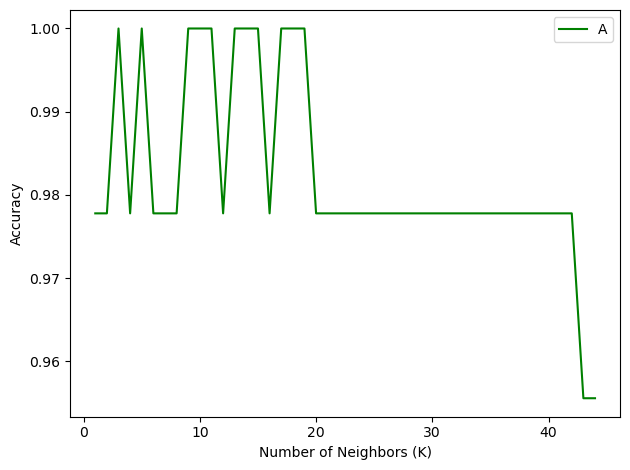

In [28]:
plt.plot(range(1,k_total),mean_acc,'g')
plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()